In [4]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.lenses import lens_util
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [5]:
run = 0
lens_paths = glob(config.machine.skypy_dir + f'/lenses_5_run{run}/*')

array_list = []
for i, lens in tqdm(enumerate(lens_paths), total=len(lens_paths)):
    lens = lens_util.unpickle_lens(lens, str(i).zfill(8))
    array = lens.get_array(num_pix=45, side=4.95, band='F106')
    array_list.append(array)

100%|██████████| 6/6 [00:00<00:00, 18.88it/s]


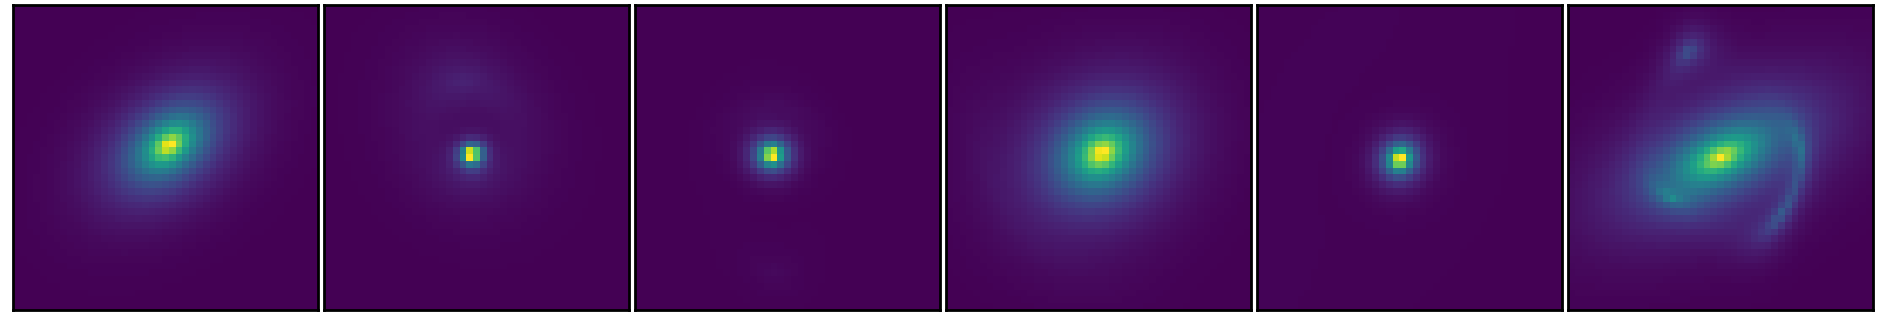

In [6]:
plot.plot_list(array_list)